# Selección de portafolios con montecarlo

### Objetivos

#### Objetivo general:

Realizar una simulación montecarlo para obtener el portafolio de mínima varianza y el de máximo radio de Sharpe. Finalmente, comparar los resultados obtenidos mediante optimización.

#### Objetivos específicos:

* Generar una gran cantidad de portafolios mediante simulación montecarlo.
* Encontrar el portafolio de mínima varianza y el de máximo Radio de Sharpe.
* Comparar los resultados optimizando.
* Mostrar gráficamente los resultados.

### Descripción del proyecto



### <font color=blue>Primera parte: Obtención de datos

In [1]:
# Importar paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [3]:
# Información 
names= ['KHC','WDC','QCOM','PCAR','AVGO','GILD','PEP','MXIM','PAYX','XEL','IBM','XOM','KO','VZ','CVX','PFE','JPM','CSCO','PG']
start = '2017-01-01'

In [5]:
# Precios diarios
closes = get_adj_closes(names,'2016-11-14')
pd.DataFrame(closes)

Symbols,AVGO,CSCO,CVX,GILD,IBM,JPM,KHC,KO,MXIM,PAYX,PCAR,PEP,PFE,PG,QCOM,VZ,WDC,XEL,XOM
Date,,,,,,,,,,,,,,,,,,,
2016-11-14,150.493546,28.586199,93.914558,69.810867,139.042984,73.272270,70.160530,37.003803,35.126469,51.218472,53.074478,92.675484,29.002939,75.616966,58.845196,40.336788,54.031013,35.091866,75.278183
2016-11-15,152.946915,28.886913,96.002724,69.447021,139.447250,73.134026,71.089226,37.246479,35.596130,50.654438,54.037041,93.095955,28.868587,76.181808,59.594933,41.376221,54.239941,35.766186,76.637566
2016-11-16,154.214951,28.768446,96.420975,69.128670,139.992111,71.327789,72.193169,37.084690,35.939358,50.727207,53.956501,92.967979,28.626743,75.790070,59.175453,41.865353,54.076431,35.547485,75.693062
2016-11-17,153.489044,27.383333,96.216316,68.746643,140.440353,71.899155,72.578651,36.958858,35.894203,50.872768,53.705963,92.885712,28.420732,75.680748,59.505688,41.786743,53.413303,35.538372,75.234047
2016-11-18,154.518188,27.501799,97.177399,67.873436,140.958908,71.613472,72.307053,36.770119,36.210335,50.881870,53.491215,92.602356,28.196806,74.705910,60.076900,41.987644,55.348175,35.419918,75.278183
2016-11-21,158.579605,27.383333,98.049522,68.200905,143.050552,71.926811,73.279564,37.174580,36.418076,51.982655,53.813339,93.470703,28.277418,75.288986,59.889481,42.197277,55.566189,35.848198,76.346260
2016-11-22,162.659439,27.237532,98.441078,67.727890,142.962662,72.369133,73.673836,37.183552,36.192265,52.310165,54.359169,94.046562,28.062452,75.398331,60.969440,43.227970,55.584358,35.802639,76.513992
2016-11-23,162.714539,27.073503,98.779221,68.491966,142.356247,72.673256,72.228203,36.958858,36.092907,52.810524,55.459766,92.803444,28.143061,75.325439,60.808788,43.874332,55.448101,35.328785,76.725838
2016-11-25,162.411362,27.419783,98.779221,68.619301,143.375748,72.645622,72.675011,37.327370,36.309692,52.746841,55.477669,93.388451,28.384903,76.036049,60.951591,44.258667,55.947708,36.012226,76.902374


In [6]:
#Calculamos los retonos
ret=closes.pct_change().dropna()
ret

Symbols,AVGO,CSCO,CVX,GILD,IBM,JPM,KHC,KO,MXIM,PAYX,PCAR,PEP,PFE,PG,QCOM,VZ,WDC,XEL,XOM
Date,,,,,,,,,,,,,,,,,,,
2016-11-15,0.016302,0.010520,0.022235,-0.005212,0.002907,-0.001887,0.013237,0.006558,0.013371,-0.011012,0.018136,0.004537,-0.004632,0.007470,0.012741,0.025769,0.003867,0.019216,0.018058
2016-11-16,0.008291,-0.004101,0.004357,-0.004584,0.003907,-0.024698,0.015529,-0.004344,0.009642,0.001437,-0.001490,-0.001375,-0.008377,-0.005142,-0.007039,0.011822,-0.003015,-0.006115,-0.012324
2016-11-17,-0.004707,-0.048147,-0.002123,-0.005526,0.003202,0.008010,0.005340,-0.003393,-0.001256,0.002869,-0.004643,-0.000885,-0.007196,-0.001442,0.005581,-0.001878,-0.012263,-0.000256,-0.006064
2016-11-18,0.006705,0.004326,0.009989,-0.012702,0.003692,-0.003973,-0.003742,-0.005107,0.008807,0.000179,-0.003999,-0.003051,-0.007879,-0.012881,0.009599,0.004808,0.036225,-0.003333,0.000587
2016-11-21,0.026284,-0.004308,0.008975,0.004825,0.014839,0.004375,0.013450,0.011000,0.005737,0.021634,0.006022,0.009377,0.002859,0.007805,-0.003120,0.004993,0.003939,0.012091,0.014188
2016-11-22,0.025727,-0.005324,0.003993,-0.006936,-0.000614,0.006150,0.005380,0.000241,-0.006201,0.006300,0.010143,0.006161,-0.007602,0.001452,0.018033,0.024426,0.000327,-0.001271,0.002197
2016-11-23,0.000339,-0.006022,0.003435,0.011282,-0.004242,0.004202,-0.019622,-0.006043,-0.002745,0.009565,0.020247,-0.013218,0.002872,-0.000967,-0.002635,0.014952,-0.002451,-0.013235,0.002769
2016-11-25,-0.001863,0.012790,0.000000,0.001859,0.007162,-0.000380,0.006186,0.009971,0.006006,-0.001206,0.000323,0.006304,0.008593,0.009434,0.002348,0.008760,0.009010,0.019345,0.002301
2016-11-28,-0.011881,-0.005650,-0.004504,-0.011930,0.008459,-0.006470,0.003255,0.005298,-0.006717,0.000173,-0.016129,0.006068,-0.004733,-0.004673,-0.009740,0.008881,0.011041,0.020243,-0.007461


### <font color=blue>Segunda parte: Generación de 1'000,000 de portafolios

In [7]:
w=[]
sharpe=[]
s=[]
er=[]
r=ret.mean()
cov=np.cov(r)
rf=.0158/252
for j in range(1000000): 
    a = np.random.random(len(closes.columns))
    a /= np.sum(a)
    ren= a.dot(r)
    ss=np.sqrt(a.dot(cov).dot(a.T))
    sh=(ren-rf)/ss
    w.append(a)
    s.append(ss)
    er.append(ren)
    sharpe.append(sh)

In [8]:
portfolio = {'Returns': er,
             'Volatility': s,
             'Sharpe Ratio': sharpe}
for i,j in enumerate(names) :
    portfolio[j+' Weight'] = [Weight[i] for Weight in w]
portfolio=pd.DataFrame(portfolio)

In [9]:
order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [j+' Weight' for j in names]
portfolio =portfolio[order]
portfolio

,Returns,Volatility,Sharpe Ratio,KHC Weight,WDC Weight,QCOM Weight,PCAR Weight,AVGO Weight,GILD Weight,PEP Weight,...,XEL Weight,IBM Weight,XOM Weight,KO Weight,VZ Weight,CVX Weight,PFE Weight,JPM Weight,CSCO Weight,PG Weight
0,0.000483,0.000119,3.538556,0.034015,0.001112,0.111361,0.038599,0.074811,0.044225,0.008370,...,0.034806,0.004257,0.041633,0.054338,0.091442,0.069788,0.107827,0.034943,0.075492,0.066879
1,0.000495,0.000115,3.746599,0.057174,0.084183,0.023497,0.088278,0.072826,0.007233,0.010152,...,0.084102,0.012010,0.065316,0.046765,0.046846,0.014955,0.085096,0.050202,0.086868,0.047024
2,0.000384,0.000115,2.788647,0.008136,0.040702,0.053456,0.067624,0.054399,0.083126,0.073303,...,0.014859,0.008028,0.090222,0.081780,0.036794,0.076635,0.040309,0.006767,0.074603,0.082063
3,0.000346,0.000113,2.517652,0.020011,0.026230,0.077586,0.027178,0.105228,0.031824,0.073217,...,0.049677,0.069622,0.061054,0.078758,0.068110,0.041336,0.041106,0.056155,0.031338,0.082872
4,0.000405,0.000131,2.616872,0.039686,0.029853,0.101264,0.046289,0.009059,0.082479,0.097298,...,0.085954,0.002844,0.028685,0.000308,0.017316,0.000338,0.115849,0.109453,0.018667,0.025472
5,0.000443,0.000111,3.444224,0.044666,0.049374,0.041461,0.088098,0.038550,0.048375,0.079306,...,0.042031,0.071384,0.024506,0.020395,0.054928,0.069856,0.042707,0.036919,0.090009,0.018623
6,0.000532,0.000116,4.058321,0.087091,0.032407,0.086272,0.052592,0.034230,0.060286,0.043615,...,0.046409,0.087076,0.091284,0.048770,0.053739,0.003324,0.074824,0.006759,0.064681,0.004976
7,0.000520,0.000121,3.787238,0.080249,0.024896,0.029901,0.034877,0.071562,0.129609,0.039960,...,0.034516,0.085406,0.044741,0.049746,0.107158,0.021888,0.021804,0.050937,0.038502,0.020714
8,0.000493,0.000116,3.695643,0.068424,0.048578,0.001678,0.046107,0.059609,0.098958,0.066982,...,0.096110,0.054058,0.046205,0.017316,0.060456,0.015589,0.069480,0.013619,0.062920,0.063383
9,0.000421,0.000124,2.881402,0.018357,0.034458,0.060678,0.005255,0.041061,0.104058,0.068647,...,0.032937,0.072415,0.006592,0.015725,0.094497,0.096849,0.008524,0.102315,0.048962,0.101806


In [10]:
min_volatility = portfolio['Volatility'].min()
max_sharpe = portfolio['Sharpe Ratio'].max()

max_sharpe_port = portfolio.loc[portfolio['Sharpe Ratio'] == max_sharpe]
min_variance_port = portfolio.loc[portfolio['Volatility'] == min_volatility]

In [11]:
max_sharpe_port

,Returns,Volatility,Sharpe Ratio,KHC Weight,WDC Weight,QCOM Weight,PCAR Weight,AVGO Weight,GILD Weight,PEP Weight,...,XEL Weight,IBM Weight,XOM Weight,KO Weight,VZ Weight,CVX Weight,PFE Weight,JPM Weight,CSCO Weight,PG Weight
329285,0.000665,0.000121,4.969758,0.095856,0.099745,0.023891,0.001469,0.018348,0.064909,0.001136,...,0.076355,0.081549,0.056746,0.034996,0.060211,0.023915,0.076316,0.034197,0.094811,0.022866


In [12]:
min_variance_port

,Returns,Volatility,Sharpe Ratio,KHC Weight,WDC Weight,QCOM Weight,PCAR Weight,AVGO Weight,GILD Weight,PEP Weight,...,XEL Weight,IBM Weight,XOM Weight,KO Weight,VZ Weight,CVX Weight,PFE Weight,JPM Weight,CSCO Weight,PG Weight
803635,0.000457,0.000104,3.779502,0.056488,0.051842,0.046307,0.048365,0.053714,0.058314,0.061923,...,0.061991,0.064535,0.025289,0.056245,0.064648,0.047019,0.042363,0.046625,0.049734,0.044846


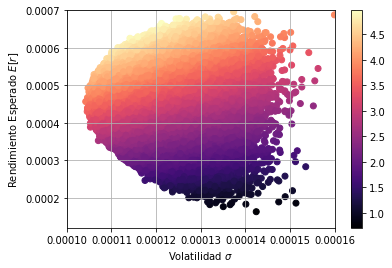

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(portfolio['Volatility'],portfolio['Returns'],c=portfolio['Sharpe Ratio'],cmap='magma')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento Esperado $E[r]$')
plt.axis([0.0001,0.00016,0.00012,0.00070])
plt.colorbar()
plt.grid()

In [14]:
wp = np.linspace(0,1.5,50)
eMVP=max_sharpe_port.iat[0,0]
sMVP=max_sharpe_port.iat[0,1]
LAC = pd.DataFrame(index=range(len(wp)),
                   data={'wp':wp,
                        'wrf':1-wp,
                        'Returns':wp*eMVP+(1-wp)*rf,
                        'Volatility':wp*sMVP})
LAC['RS'] = (LAC['Returns']-rf)/LAC['Volatility']
eMVP

0.0006650511250822806

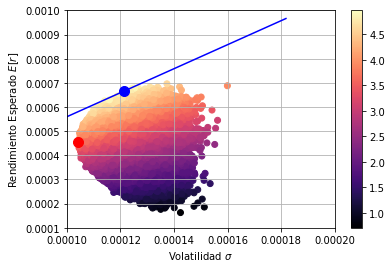

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(portfolio['Volatility'],portfolio['Returns'],c=portfolio['Sharpe Ratio'],cmap='magma')
plt.plot(LAC['Volatility'],LAC['Returns'],'-b')
plt.plot(min_variance_port['Volatility'],min_variance_port['Returns'],'or',ms=10, label='Port Min Variance')
plt.plot(max_sharpe_port['Volatility'],max_sharpe_port['Returns'],'ob',ms=10, label='Port Max Sharpe')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento Esperado $E[r]$')
plt.axis([0.0001,0.0002,0.0001,0.001])
plt.colorbar()
plt.grid()

### <font color=blue>Tercera parte: Generación de portafolios con función optimize

In [16]:
from scipy.optimize import minimize
def var(w,Sigma):
    return w.dot(Sigma).dot(w)
n=len(r)
w0=np.ones((n,))/n
# Cotas de las variables
bnds=((0,1),)*n
# Restricciones
cons={'type':'eq','fun': lambda w: w.sum()-1}
minvar = minimize(fun=var,
                 x0=w0,
                 args=(cov,),
                 bounds=bnds,
                 constraints=cons)
minvar

     fun: 1.052864591009128e-08
     jac: array([2.10572948e-08, 2.10572948e-08, 2.10572948e-08, 2.10572948e-08,
       2.10572948e-08, 2.10572948e-08, 2.10572948e-08, 2.10572948e-08,
       2.10572948e-08, 2.10572948e-08, 2.10572948e-08, 2.10572948e-08,
       2.10572948e-08, 2.10572948e-08, 2.10572948e-08, 2.10572948e-08,
       2.10572948e-08, 2.10572948e-08, 2.10572948e-08])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158])

### <font color=blue> Cuarta parte: Comparar Resultados

In [17]:
w_minvar = minvar.x
E_minvar = r.dot(w_minvar)
s_minvar = np.sqrt(var(w_minvar, cov))
RS_minvar = (E_minvar)/ s_minvar
w_minvar, E_minvar, s_minvar, RS_minvar

(array([0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
        0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
        0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
        0.05263158, 0.05263158, 0.05263158, 0.05263158]),
 0.0004524477813554955,
 0.00010260919018339088,
 4.409427464994575)

In [18]:
min_variance_port

,Returns,Volatility,Sharpe Ratio,KHC Weight,WDC Weight,QCOM Weight,PCAR Weight,AVGO Weight,GILD Weight,PEP Weight,...,XEL Weight,IBM Weight,XOM Weight,KO Weight,VZ Weight,CVX Weight,PFE Weight,JPM Weight,CSCO Weight,PG Weight
803635,0.000457,0.000104,3.779502,0.056488,0.051842,0.046307,0.048365,0.053714,0.058314,0.061923,...,0.061991,0.064535,0.025289,0.056245,0.064648,0.047019,0.042363,0.046625,0.049734,0.044846


In [19]:
def menos_RS(w, Eind,Sigma):
    Ep=Eind.dot(w)
    sp=np.sqrt(w.dot(Sigma).dot(w))
    RS=(Ep-rf)/sp
    return -RS
# Dato inicial
w0=np.ones((n,))/n
# Cotas de las variables
bnds=((0,1),)*n
# Restricciones
cons={'type':'eq','fun': lambda w: w.sum()-1}
EMV=minimize(fun=menos_RS,
                 x0=w0,
                 args=(r,cov),
                 bounds=bnds,
                 constraints=cons)
EMV

     fun: -5.269030729987001
     jac: array([-0.50691456, -0.50738221, -0.51125669, -0.3039766 , -0.20280093,
       -0.50975335,  7.2524513 , -0.50789464, -0.5082655 , -0.50978839,
       -0.50946575, -0.51005214, -0.50726062, -0.50883985, -0.5091688 ,
       -0.51089233, -0.5090484 , -0.50594068,  0.50917733])
 message: 'Optimization terminated successfully.'
    nfev: 530
     nit: 24
    njev: 24
  status: 0
 success: True
       x: array([1.24524876e-01, 7.28590745e-02, 3.45287401e-02, 1.19702293e-15,
       7.51564207e-16, 9.04101040e-02, 2.94372886e-14, 5.43670302e-02,
       8.19314631e-02, 7.63283145e-02, 6.88223937e-02, 5.59739946e-02,
       4.19508717e-02, 7.24521351e-02, 6.85064983e-02, 6.06387269e-02,
       1.39198052e-02, 8.27859720e-02, 5.82647394e-16])

In [20]:
w_EMV = EMV.x
E_EMV = r.dot(w_EMV)
s_EMV = np.sqrt(var(w_EMV, cov))
RS_EMV = (E_EMV)/ s_EMV
w_EMV, E_EMV, s_EMV, RS_EMV

(array([1.24524876e-01, 7.28590745e-02, 3.45287401e-02, 1.19702293e-15,
        7.51564207e-16, 9.04101040e-02, 2.94372886e-14, 5.43670302e-02,
        8.19314631e-02, 7.63283145e-02, 6.88223937e-02, 5.59739946e-02,
        4.19508717e-02, 7.24521351e-02, 6.85064983e-02, 6.06387269e-02,
        1.39198052e-02, 8.27859720e-02, 5.82647394e-16]),
 0.0007122600627105319,
 0.00012327915385183599,
 5.777619657955856)

In [21]:
max_sharpe_port

,Returns,Volatility,Sharpe Ratio,KHC Weight,WDC Weight,QCOM Weight,PCAR Weight,AVGO Weight,GILD Weight,PEP Weight,...,XEL Weight,IBM Weight,XOM Weight,KO Weight,VZ Weight,CVX Weight,PFE Weight,JPM Weight,CSCO Weight,PG Weight
329285,0.000665,0.000121,4.969758,0.095856,0.099745,0.023891,0.001469,0.018348,0.064909,0.001136,...,0.076355,0.081549,0.056746,0.034996,0.060211,0.023915,0.076316,0.034197,0.094811,0.022866


### Conclusion

Despues de elaborar nuestro proyecto, podemos concluir, que al hacer la simulación montecarlo con la suficiente cantidad de activos, se puede llegar a un resultado aproximado. Sin embargo, hacerlo por este metodo es mucho más tardado y mucho menos preciso que hacerlo optimizando. Por lo que consideramos que es una mucho mejor opción utilizar la función optimize para obtener el portafolio de mínima varianza y el de máximo radio de sharpe.

### Referencias

- N/A. (2019). NASDAQ-100. 19 de noviembre del 2019, de Nasdaq Sitio web: https://indexes.nasdaqomx.com/docs/FS_NDX.pdf

- Yurong Zhu. (2019). Acciones con mayor rentabilidad por dividendo 2019: ¿Quién da más en EEUU? . 19 de noviembre del 2019, de N/A Sitio web: https://www.rankia.com/blog/bolsa-al-dia/2713747-acciones-mayor-rentabilidad-por-dividendo-2019-quien-mas-eeuu-actualizado-17-enero

- N/A. (2019). El dOW JONES. 19 de noviembre del 2019, de CaixaBank Sitio web: https://www.caixabank.com/deployedfiles/caixabank/Estaticos/PDFs/AprendaConCaixaBank/Aula_780.pdf

- N/A. (2019). LA BOLSA DE VALORES Y LOS PRINCIPALES ÍNDICES EN EL MUNDO. 19 de noviembre del 2019, de Universidad Veracruzana Sitio web: https://www.uv.mx/personal/mvalle/files/2011/08/BOLSA-DE-VALORES-E-INDICES-BURSATILES.pdf

- Martínez Guillermo. (2011). Las siete empresas de tecnología que valen oro en el Nasdaq. 19 de noviembre del 2019, de Excelsior Sitio web: https://www.excelsior.com.mx/node/716072


<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Diego Orozco, Carolina Flores y Karla Antón.
</footer>